# Numerical solution of ODEs - Batch reactor model

by Xiaofeng Liu, Ph.D., P.E.  
Associate Professor  
Department of Civil and Environmental Engineering  
Institute of CyberScience  
Penn State University 

223B Sackett Building, University Park, PA 16802  
Web: http://water.engr.psu.edu/liu/

---

## Numerical solution of ODEs

This Jupyter Notebook implements and demonstrates numerical solution of ODEs. 



Numerical solution of the prey and predator model or Lokta-Voltera model.

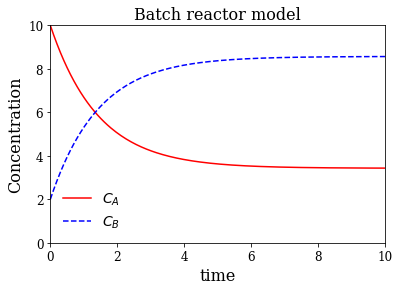

In [5]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

#plt.rc('text', usetex=True)  #allow the use of Latex for math expressions and equations
plt.rc('font', family='serif') #specify the default font family to be "serif"


# dA/dt =  -k1*A + km1*B
# dB/dt =   k1*A - km1*B 

# *  u: number of preys (for example, rabbits)
# 
# *  v: number of predators (for example, foxes)  
#   
# * a, b, c, d are constant parameters defining the behavior of the population:    
# 
#   + a is the natural growing rate of rabbits, when there's no fox
# 
#   + b is the natural dying rate of rabbits, due to predation
# 
#   + c is the natural dying rate of fox, when there's no rabbit
# 
#   + d is the factor describing how many caught rabbits let create a new fox

def dF_dt(F, t, k1,km1):
    return [ -k1*F[0] + km1*F[1], k1*F[0] - km1*F[1]]


k1  = 0.5
km1 = 0.2

t = np.linspace(0, 10, 200)              # time
F0 = [10, 2]                   # initials conditions: concentration for A and B  

F, infodict = integrate.odeint(dF_dt, F0, t, args=(k1,km1), full_output=True)

A, B = F.T

plt.plot(t, A, 'r-', label='$C_A$')
plt.plot(t, B  , 'b--', label='$C_B$')

#set the limit for the x and y axes
plt.xlim([0,10])
plt.ylim([0,10])

#set x and y axes label and font size
plt.xlabel('time',fontsize=16)
plt.ylabel('Concentration',fontsize=16)

#show the ticks on both axes and set the font size 
plt.tick_params(axis='both', which='major', labelsize=12)

#show title and set font size
plt.title('Batch reactor model',fontsize=16)

#plt.grid()

#show legend, set its location, font size, and turn off the frame
plt.legend(loc='lower left',fontsize=14,frameon=False)
plt.savefig("batch-reactor-model.png",dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()
